<a href="https://colab.research.google.com/github/rishim929/AIassesment/blob/main/WLVID_RishimSapkotaR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.feature_selection import SelectKBest, f_regression


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd

file_path = '/content/drive/MyDrive/Life Expectancy Data.csv'
df = pd.read_csv(file_path)

df.head()


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

,0
Country,0
Year,0
Status,0
Life expectancy,10
Adult Mortality,10
infant deaths,0
Alcohol,194
percentage expenditure,0
Hepatitis B,553
Measles,0


In [ ]:
df.fillna(df.mean(numeric_only=True), inplace=True)


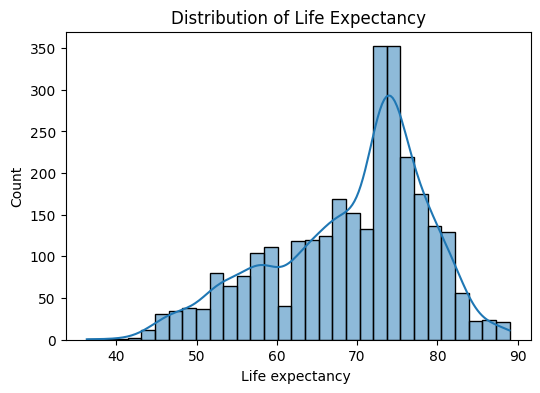

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(df['Life expectancy '], kde=True)
plt.title("Distribution of Life Expectancy")
plt.show()


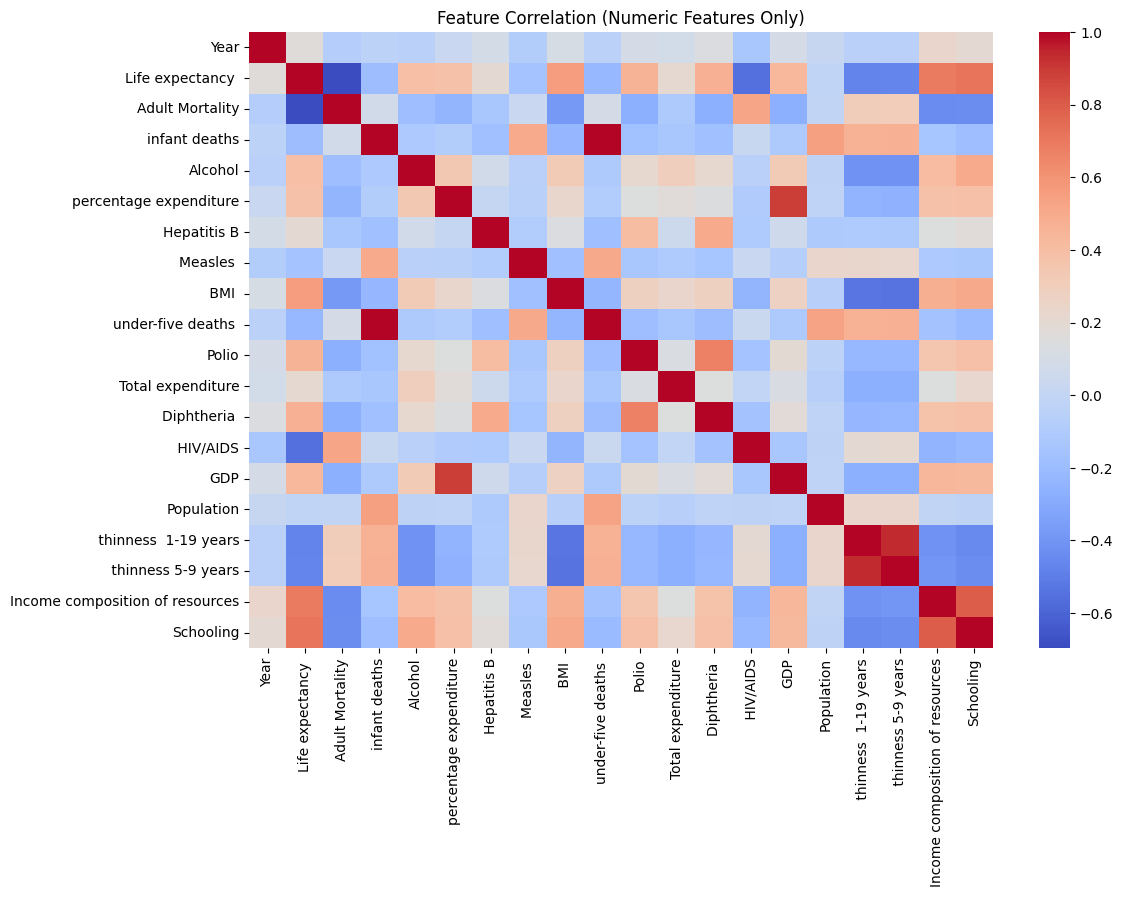

In [ ]:
numeric_df = df.select_dtypes(include=np.number)

plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(), cmap='coolwarm', annot=False)
plt.title("Feature Correlation (Numeric Features Only)")
plt.show()


In [ ]:
print(X_train.dtypes)


NameError: name 'X_train' is not defined

In [ ]:
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
X_train_numeric = X_train[numeric_cols]
X_test_numeric = X_test[numeric_cols]


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_numeric)
X_test_scaled = scaler.transform(X_test_numeric)


In [ ]:
# Drop columns not needed above 3 is for this
X = df.drop(columns=['Life expectancy ', 'Country', 'Year'], errors='ignore')
y = df['Life expectancy ']

# Split the dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Select only numeric columns for scaling
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numeric_cols])
X_test_scaled = scaler.transform(X_test[numeric_cols])



In [ ]:
mlp = MLPRegressor(
    hidden_layer_sizes=(64, 32),
    activation='relu',
    solver='adam',
    max_iter=500,
    random_state=42
)

mlp.fit(X_train_scaled, y_train)

y_pred_mlp = mlp.predict(X_test_scaled)

print("MLP RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_mlp)))
print("MLP R²:", r2_score(y_test, y_pred_mlp))


MLP RMSE: 2.3695157187215683
MLP R²: 0.9351926265871011


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Create processed versions of X_train and X_test
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Now  original lines will work
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_processed, y_train)
y_pred_rf = rf.predict(X_test_processed)


In [ ]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_processed, y_train)   # Use processed X with encoded categorical columns
y_pred_rf = rf.predict(X_test_processed)


In [ ]:
def evaluate(model, y_true, y_pred):
    print(model)
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("R²:", r2_score(y_true, y_pred))
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print()

evaluate("Linear Regression", y_test, y_pred_lr)
evaluate("Random Forest", y_test, y_pred_rf)


Linear Regression
RMSE: 3.9209398281263734
R²: 0.8225460841751837
MAE: 2.8627529566179173

Random Forest
RMSE: 1.6434287440386801
R²: 0.9688249621500147
MAE: 1.0625807753429222



In [ ]:
# Random Forest parameter grid
param_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20]
}

# GridSearchCV with RandomForest
grid_rf = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_rf,
    cv=5,
    n_jobs=-1
)

# Fit model
grid_rf.fit(X_train_processed, y_train)

# Predict
y_pred = grid_rf.predict(X_test_processed)

# Best parameters
print("Best parameters:", grid_rf.best_params_)

In [ ]:
selector = SelectKBest(score_func=f_regression, k=10)
X_train_fs = selector.fit_transform(X_train_scaled, y_train)
X_test_fs = selector.transform(X_test_scaled)

selected_features = numeric_cols[selector.get_support()]
selected_features


Index(['Adult Mortality', ' BMI ', 'Polio', 'Diphtheria ', ' HIV/AIDS', 'GDP',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [41]:
rf_final = RandomForestRegressor(
    **grid_rf.best_params_,
    random_state=42
)

rf_final.fit(X_train_fs, y_train)
y_pred_final = rf_final.predict(X_test_fs)

print("Final RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_final)))
print("Final R²:", r2_score(y_test, y_pred_final))


Final RMSE: 1.7127677330271933
Final R²: 0.9661388130560923
